In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
data1 = pd.read_csv('Crop_recommendation.csv')
data2 = pd.read_csv('Generated data.csv')

In [7]:
#combining the two datasets
dataset = pd.concat([data1, data2], ignore_index=True)
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42.0,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58.0,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55.0,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35.0,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42.0,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
12195,47,73.0,19,27.440033,67.104644,6.661871,72.506698,blackgram
12196,83,73.0,45,25.147480,83.346882,5.565029,98.666794,banana
12197,88,38.0,43,29.104035,79.195886,6.324270,92.078358,jute
12198,22,40.0,24,28.561498,83.638022,6.689825,41.013132,mungbean


In [8]:
df1 = dataset[['N', 'P', 'K', 'ph', 'label']].copy()
df2 = dataset[['temperature', 'humidity', 'rainfall', 'label']].copy()

crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

df1['Crop'] = df1['label'].map(crop_dict)
df1.drop('label',axis=1,inplace=True)

dataset['Crop'] = dataset['label'].map(crop_dict)
dataset.drop('label',axis=1,inplace=True)

df2['Crop'] = df2['label'].map(crop_dict)
df2.drop('label',axis=1,inplace=True)

In [5]:
!pip install pycaret

In [6]:
from pycaret.classification import *



# Step 3: Initialize PyCaret
clf = setup(dataset, target='Crop', session_id=42)

# Step 4: Compare models
best_model = compare_models()

# Step 5: Create the best model
final_model = create_model(best_model)

# Step 6: Tune the model (optional)
tuned_model = tune_model(final_model)

# Step 7: Evaluate the model
evaluate_model(tuned_model)

# Step 8: Make predictions on new data
#new_data_predictions = predict_model(tuned_model, data=new_data)



,Description,Value
0,Session id,42
1,Target,Crop
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21"
4,Original data shape,"(12200, 8)"
5,Transformed data shape,"(12200, 8)"
6,Transformed train set shape,"(8540, 8)"
7,Transformed test set shape,"(3660, 8)"
8,Numeric features,7
9,Rows with missing values,0.0%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8799,0.9932,0.8799,0.8807,0.8792,0.8720,0.8721,4.8640
xgboost,Extreme Gradient Boosting,0.8792,0.9933,0.8792,0.8798,0.8784,0.8712,0.8713,3.9490
rf,Random Forest Classifier,0.8768,0.9896,0.8768,0.8772,0.8759,0.8687,0.8688,0.1930
lightgbm,Light Gradient Boosting Machine,0.8756,0.9926,0.8756,0.8761,0.8747,0.8674,0.8676,2.8550
et,Extra Trees Classifier,0.8689,0.9802,0.8689,0.8698,0.8681,0.8602,0.8604,1.0510
knn,K Neighbors Classifier,0.8425,0.9646,0.8425,0.8459,0.8424,0.8323,0.8324,0.0820
dt,Decision Tree Classifier,0.8340,0.9155,0.8340,0.8357,0.8334,0.8231,0.8232,0.0660
qda,Quadratic Discriminant Analysis,0.8285,0.9859,0.8285,0.8231,0.8193,0.8171,0.8180,0.0600
nb,Naive Bayes,0.8265,0.9856,0.8265,0.8257,0.8216,0.8151,0.8157,0.0570
lr,Logistic Regression,0.8089,0.9854,0.8089,0.7953,0.7955,0.7959,0.7970,0.6020


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8712,0.9927,0.8712,0.8719,0.8712,0.8628,0.8628
1,0.8876,0.9934,0.8876,0.8871,0.8867,0.8802,0.8803
2,0.8759,0.9938,0.8759,0.8763,0.8750,0.8677,0.8678
3,0.8724,0.9922,0.8724,0.8729,0.8715,0.8639,0.8641
4,0.8829,0.9924,0.8829,0.8865,0.8827,0.8753,0.8755
5,0.8841,0.9947,0.8841,0.8842,0.8826,0.8764,0.8765
6,0.8841,0.9939,0.8841,0.8838,0.8836,0.8765,0.8765
7,0.8806,0.9914,0.8806,0.8805,0.8789,0.8726,0.8728
8,0.8782,0.9935,0.8782,0.8798,0.8782,0.8703,0.8703


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8712,0.9925,0.8712,0.8751,0.8708,0.8628,0.8629
1,0.8864,0.9923,0.8864,0.8878,0.8860,0.8789,0.8790
2,0.8782,0.9927,0.8782,0.8781,0.8773,0.8702,0.8703
3,0.8806,0.9920,0.8806,0.8799,0.8796,0.8727,0.8728
4,0.8782,0.9934,0.8782,0.8822,0.8782,0.8703,0.8705
5,0.8993,0.9942,0.8993,0.9012,0.8988,0.8926,0.8928
6,0.8911,0.9924,0.8911,0.8917,0.8898,0.8839,0.8841
7,0.8759,0.9909,0.8759,0.8765,0.8753,0.8676,0.8678
8,0.8806,0.9926,0.8806,0.8825,0.8803,0.8727,0.8729


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [9]:
# this is the main code using the whole dataset

# Split the dataset into features and target variable
X = dataset.drop('Crop', axis=1) 
y = dataset['Crop']

# Handle missing data
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# using the Gradient boosting classifier
gb_clf = GradientBoostingClassifier()

# Train the model
gb_clf.fit(X_train_scaled, y_train)

# Make predictions
predictions = gb_clf.predict(X_test_scaled)

# Evaluate the model using mean squared error and prediction score
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)
print("accuracy Score:", accuracy_score(y_test, predictions)) 

Mean Absolute Error: 0.33797814207650273
R-squared Score: 0.8797814207650273


In [12]:
# using the second dataframe (nutrients)
# Split the dataset into features and target variable
X = df1.drop('Crop', axis=1) 
y = df1['Crop']

# Handle missing data
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# using the Random Forest regressor
gb_clf = GradientBoostingClassifier()

# Train the model
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Evaluate the model using mean squared error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
r2_score = gb_clf.score(X_test, y_test)
print("R-squared Score:", r2_score)


Mean Absolute Error: 0.46475409836065573
R-squared Score: 0.8245901639344262


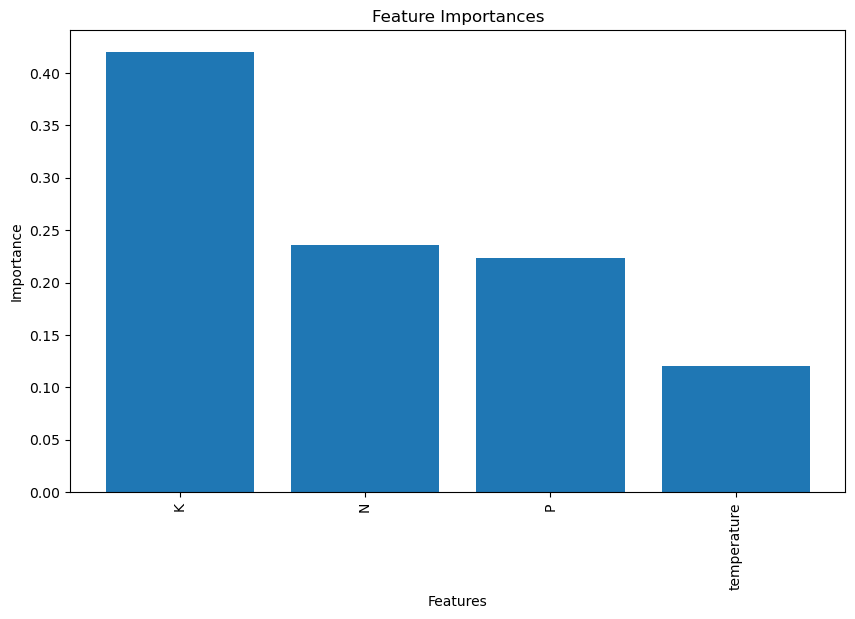

In [13]:
import numpy as np

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Initialize and train the Random Forest model
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X, y)

# Retrieve feature importances
importances = gb_clf.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# Get the names of the features in the dataset
feature_names = dataset.columns[:-1]  # Assuming 'df' is your DataFrame and the target variable is the last column

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), sorted_importances, tick_label=feature_names[sorted_indices])
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


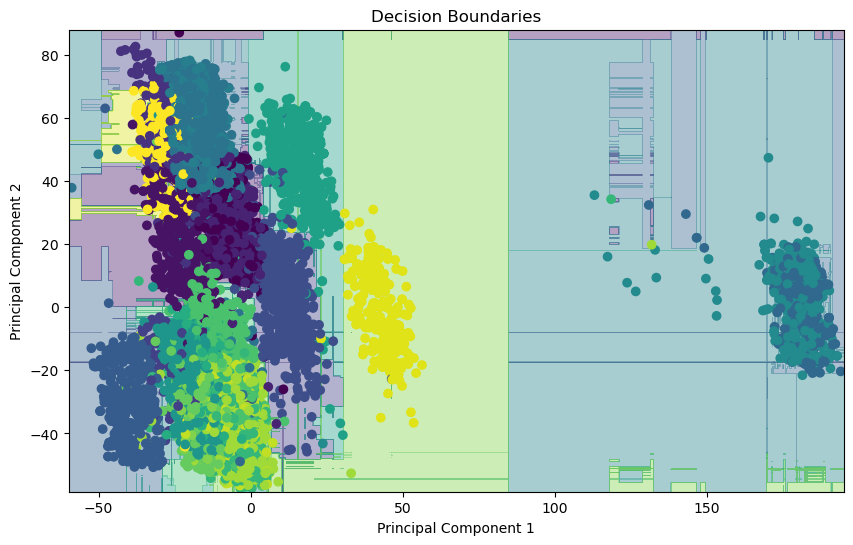

In [15]:
from sklearn.decomposition import PCA

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Train the Random Forest model
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_reduced, y)

# Create a meshgrid for the decision boundary plot
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each meshgrid point
Z = gb_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.title('Decision Boundaries')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
